Let us start with a simple three state markov model:

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import math
import matplotlib.ticker as ticker

In [2]:
# Initialization of energy landscape units of K_BT

# Energy Barrier Height
E_chem = 25
# Purturbation Magnitude
E_trap = 15
# Trap Position in radian
theta = -0.0*np.pi/3.0
# Barrier Position
barrier_relative_position = 1.0*np.pi/3.0

$E_{state=i}(\theta_0) = - T_{trap} \times \cos(\theta_i - \theta_0)$ 

$E_{barrier=i}^{\dagger}(\theta_0) = E_{chem} - T_{trap} \times \cos(\theta_i^\dagger - \theta_0)$ 

In [3]:
def Energy_Levels(E_chem,E_trap,theta,barrier_relative_position):
    #initialization of energy landascape
    
    E_0 = -E_trap * np.cos(-2.0*np.pi/3.0 - theta) 
    E_01 = E_chem - E_trap * np.cos(barrier_relative_position-2.0*np.pi/3.0 - theta)
    E_1 = -E_trap * np.cos(+0.0*np.pi/3.0 - theta)
    E_12 = E_chem - E_trap * np.cos(barrier_relative_position+0.0*np.pi/3.0 - theta)
    E_2 = -E_trap * np.cos(+2.0*np.pi/3.0 - theta) 
    E_23 = E_chem - E_trap * np.cos(barrier_relative_position+2.0*np.pi/3.0 - theta)
    E_3 = -E_trap * np.cos(+4.0*np.pi/3.0 - theta) 
    E_34 = E_chem - E_trap * np.cos(barrier_relative_position+4.0*np.pi/3.0 - theta)
    E_4 = -E_trap * np.cos(+6.0*np.pi/3.0 - theta) 
    
    E = [E_0,E_01,E_1,E_12,E_2,E_23,E_3,E_34,E_4]
    
    return E

$T_{ij}(\theta_0) = \min (1,e^{-\beta(E_j^\dagger(\theta_0)-E_i(\theta_0)}))$

In [4]:
def Transition_Rates(Energy_Levels):
    # Calculating transition rates
    
    T12 = min(1,np.exp(-(Energy_Levels[3] - Energy_Levels[2])))
    T21 = min(1,np.exp(-(Energy_Levels[3] - Energy_Levels[4])))
    T23 = min(1,np.exp(-(Energy_Levels[5] - Energy_Levels[4])))
    T32 = min(1,np.exp(-(Energy_Levels[5] - Energy_Levels[6])))
    T31 = min(1,np.exp(-(Energy_Levels[7] - Energy_Levels[6])))
    T13 = min(1,np.exp(-(Energy_Levels[7] - Energy_Levels[8])))
    
    T11 = 1 - T12 - T13
    T22 = 1 - T21 - T23
    T33 = 1 - T31 - T32
    
    T = np.array([[T11,T12,T13],
                  [T21,T22,T23],
                  [T31,T32,T33]])
    
    return T

In [5]:
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

def plot_energy_landscape(energy_levels):
    # Fdunction to plot energy landscape
    
    x = np.linspace(-2.0*np.pi/3.0, +6.0*np.pi/3.0, num=9)
    y = energy_levels              # y-coordinates

    plt.figure(figsize=(8, 6))
    plt.plot(np.rad2deg(x), y, 'b-', marker='o')
    plt.xlabel('Angle (in degrees)')
    plt.ylabel('Energy')
    plt.title('Energy Landscape')
    plt.grid(True)
    plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(base=120))
    plt.show()

### Sample Energy Landscape

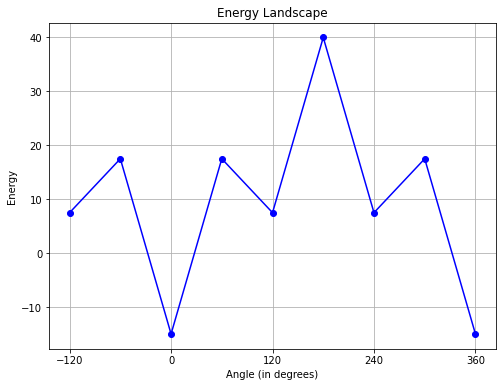

In [6]:
plot_energy_landscape(Energy_Levels(E_chem,E_trap,theta,barrier_relative_position))

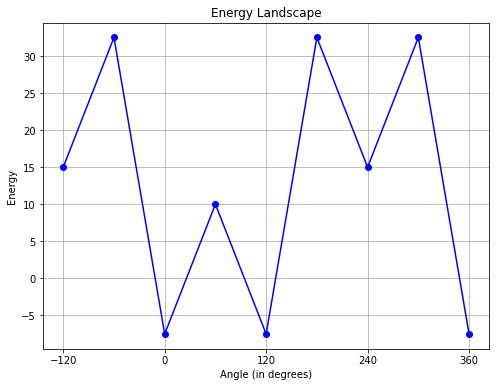

In [7]:
plot_energy_landscape(Energy_Levels(E_chem,E_trap,np.deg2rad(60),barrier_relative_position))

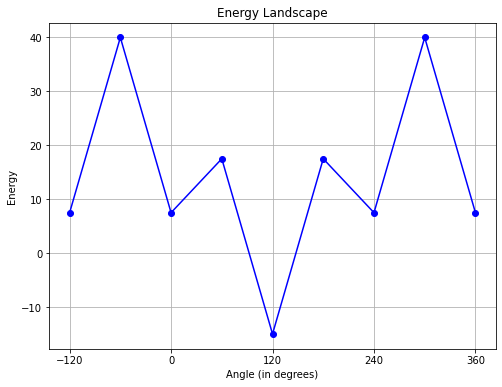

In [8]:
plot_energy_landscape(Energy_Levels(E_chem,E_trap,np.deg2rad(120),barrier_relative_position))

$T\vec \pi=\vec \pi$

Looking for eigenvector($\vec \pi$) for the eigenvalue($\lambda_i = 1$)

In [9]:
def calculate_stationary_distribution(transition_rates):
    
    # Convert transition rates to stationary probabilities
    transition_probabilities = transition_rates / np.sum(transition_rates, axis=1, keepdims=True)
    
    # Compute the eigenvector corresponding to eigenvalue 1
    eigenvalues, eigenvectors = np.linalg.eig(transition_probabilities.T)
    stationary_index = np.argmin(np.abs(eigenvalues - 1.0))
    stationary_distribution = np.real_if_close(np.abs(eigenvectors[:, stationary_index]) / np.sum(np.abs(eigenvectors[:, stationary_index])))
    
    return stationary_distribution


In [10]:
def calculate_entropy_rate(probabilities):
    # Calculation of entrop rate
    entropy = -np.sum(probabilities * np.log2(probabilities))
    return entropy

$F = -\beta T \log \sum_{i=states} \exp(-\beta E_i)$ 

In [11]:
def Free_Energy(Energy_Levels):
    F = -np.log(np.exp(-Energy_Levels[2])+np.exp(-Energy_Levels[4])+np.exp(-Energy_Levels[6]))
    return F

### Plotting Eq Distribution as one rotates magnetic trap

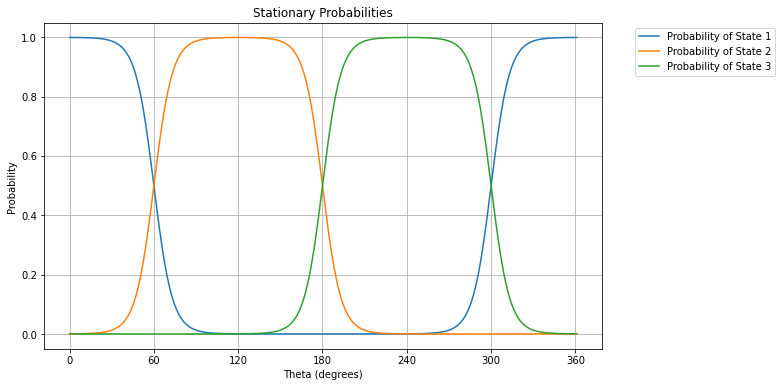

In [12]:
theta_start = np.deg2rad(0)  # Start theta in radians
theta_end = np.deg2rad(361)  # End theta in radians
num_steps = 360  # Number of steps

theta_values = np.linspace(theta_start, theta_end, num_steps)

probabilities = []
entropy_rates = []

E_trap= 5

for theta in theta_values:
    # Calculate transition rates and probabilities for each theta value
    transition_rate = Transition_Rates(Energy_Levels(E_chem,E_trap,theta,barrier_relative_position))
    stationary_distribution = calculate_stationary_distribution(transition_rate)
    probabilities.append(stationary_distribution)
    entropy_rate = calculate_entropy_rate(stationary_distribution)
    entropy_rates.append(entropy_rate)


probabilities = np.array(probabilities)

# Plot the probabilities
plt.figure(figsize=(10, 6))
plt.plot(np.rad2deg(theta_values), probabilities[:, 0], label='Probability of State 1')
plt.plot(np.rad2deg(theta_values), probabilities[:, 1], label='Probability of State 2')
plt.plot(np.rad2deg(theta_values), probabilities[:, 2], label='Probability of State 3')
plt.xlabel('Theta (degrees)')
plt.ylabel('Probability')
plt.title('Stationary Probabilities')
plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(base=60))
plt.grid(True)
plt.show()


### plotting  Entropy Rate for values of trap magnitue

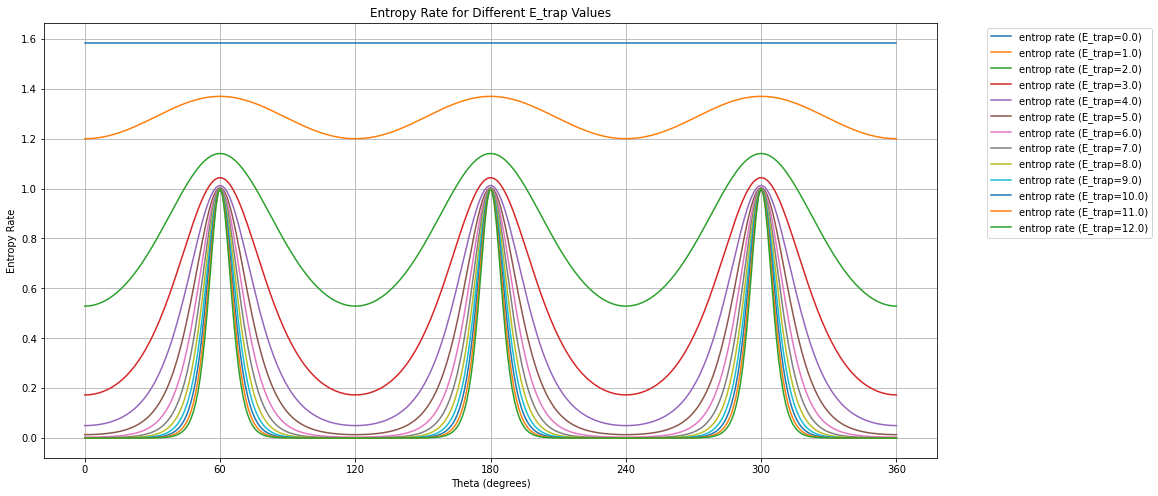

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

E_trap_values = np.arange(0,E_chem/2,1)  # Define different E_trap values

theta_start = np.deg2rad(0)  # Start theta in radians
theta_end = np.deg2rad(360)  # End theta in radians
num_steps = 360  # Number of steps

theta_values = np.linspace(theta_start, theta_end, num_steps)

probabilities = []
entropy_rates = []

for E_trap in E_trap_values:
    temp_probabilities = []
    temp_entropy_rates = []
    
    for theta in theta_values:
        # Calculate transition rates and probabilities for each theta value and E_trap
        transition_rate = Transition_Rates(Energy_Levels(E_chem, E_trap, theta,barrier_relative_position))
        stationary_distribution = calculate_stationary_distribution(transition_rate)
        temp_probabilities.append(stationary_distribution)
        entropy_rate = calculate_entropy_rate(stationary_distribution)
        temp_entropy_rates.append(entropy_rate)

    probabilities.append(temp_probabilities)
    entropy_rates.append(temp_entropy_rates)

probabilities = np.array(probabilities)
entropy_rates = np.array(entropy_rates)

# Plot the probabilities for different E_trap values
plt.figure(figsize=(16, 8))

for i, E_trap in enumerate(E_trap_values):
    plt.plot(np.rad2deg(theta_values), entropy_rates[i], label=f'entrop rate (E_trap={E_trap})')

plt.xlabel('Theta (degrees)')
plt.ylabel('Entropy Rate')
plt.title('Entropy Rate for Different E_trap Values')
plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(base=60))
plt.grid(True)
plt.show()


$\vec P(t+\Delta) = T \vec P(t)$

In [14]:
def calculate_probability_evolution(p0,transition_rates, dt):

    p  = np.matmul(transition_rates.T,p0)
    p /= np.sum(p)

    return p

$\theta(t) = \int_{t=0}^{t} \dot \theta(t')dt'$

$\theta(t=0) = 0$

$\theta(t=T) = 2\pi$

In [15]:
def constant_velocity(T):
    return 2*np.pi/T

In [16]:
def change_control_parameter(theta_i, t, T):
        
    if t <= T:
        theta = theta_i + constant_velocity(T) * dt
    else:
        theta = 2*np.pi

    return theta

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def master_equation(p0, dt, T, theta_end):

    num_states = len(p0)    
    p_evolution = [p0]
    control_evolution = [0]

    theta = 0
    
    while True:
        # Code to be executed
        theta += constant_velocity(T) * dt
        control_evolution.append(theta)
        transition_matrix = Transition_Rates(Energy_Levels(E_chem, E_trap, theta, barrier_relative_position))
        
        p  = np.matmul(transition_matrix.T,p_evolution[-1])
        p /= np.sum(p)
        p_evolution.append(p)


        # Condition to check if the loop should continue
        if theta > theta_end:
            break        
        
    return p_evolution, control_evolution


### Non_eq Probability as a funciton of Time

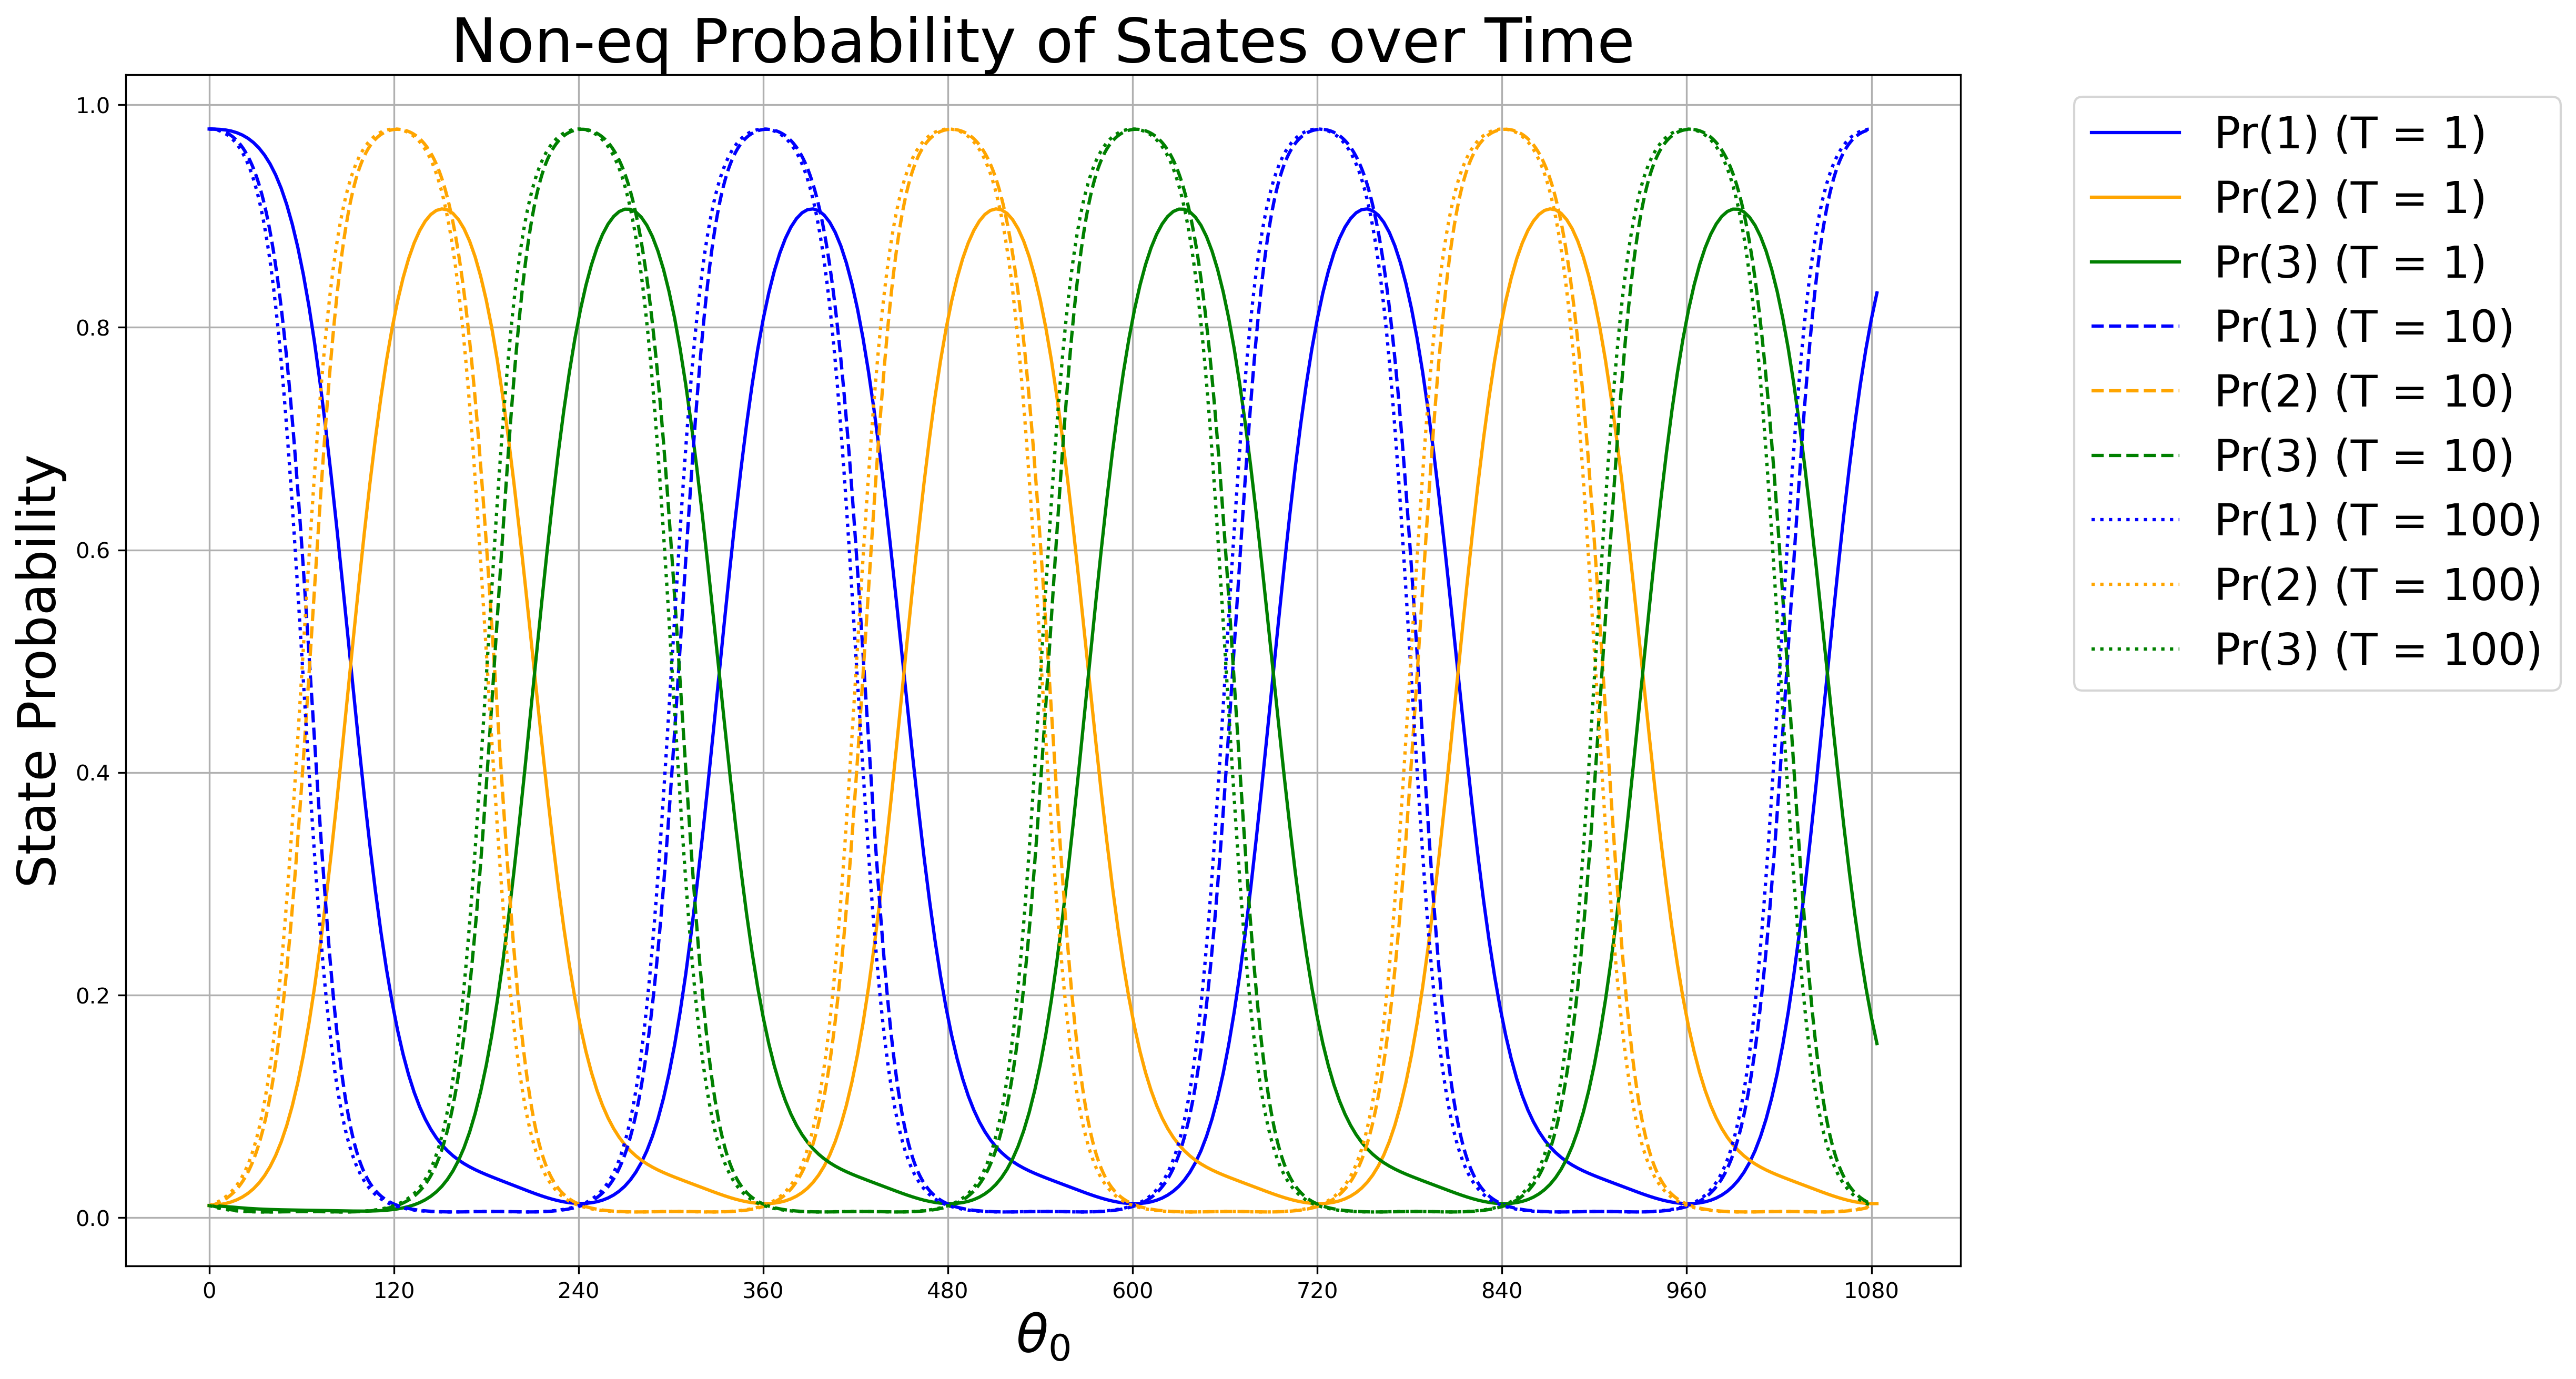

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Define the initial probability distribution
# Energy Barrier Height
T_values = [1, 10, 100]  # Different values of T

# Set the line styles for p0 probabilities
line_styles = ['-', '--', ':']


plt.figure(figsize=(15, 10),dpi = 300)

for i, T in enumerate(T_values):
    
    E_chem = 5
    # Perturbation Magnitude
    E_trap = 3

    theta0 = 0
    theta_end = 6 * np.pi

    transition_rate = Transition_Rates(Energy_Levels(E_chem, E_trap, theta0, barrier_relative_position))
    p0 = calculate_stationary_distribution(transition_rate)

    # Define the time step and number of steps
    dt = 0.01
    # Solve the master equation
    p_evolution, control_evolution = master_equation(p0, dt, T, theta_end)

    # Plot the probabilities as a function of time
    p0 = [sublist[0] for sublist in p_evolution]
    p1 = [sublist[1] for sublist in p_evolution]
    p2 = [sublist[2] for sublist in p_evolution]
    
    # Plot the probabilities on the same plot with the same color and different line styles
    plt.plot(np.rad2deg(control_evolution), p0, label='Pr(1) (T = {})'.format(T),
             color='blue', linestyle=line_styles[i % len(line_styles)])
    # Plot the probabilities on the same plot with the same color and different line styles
    plt.plot(np.rad2deg(control_evolution), p1, label='Pr(2) (T = {})'.format(T),
             color='orange', linestyle=line_styles[i % len(line_styles)])
    # Plot the probabilities on the same plot with the same color and different line styles
    plt.plot(np.rad2deg(control_evolution), p2, label='Pr(3) (T = {})'.format(T),
             color='green', linestyle=line_styles[i % len(line_styles)])



plt.xlabel(r'$\theta_0$', fontsize=24)  # Adjust the fontsize as needed
plt.ylabel('State Probability', fontsize=24)
plt.title('Non-eq Probability of States over Time', fontsize=28)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',fontsize=20)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(base=120))
plt.grid(True)
plt.show()


### Dynamic Eigenvalues as a function of control paramethers:

$\tau_{relaxation} \propto \frac{1}{\lambda_{max}}$

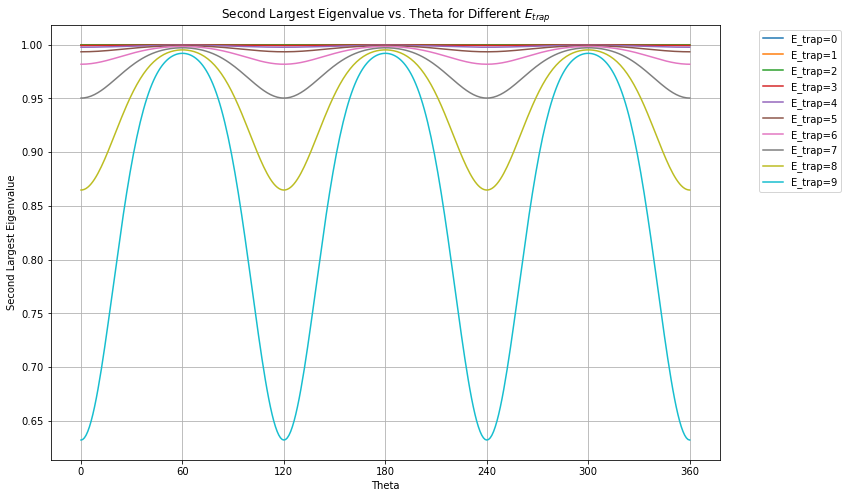

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Energy Barrier Height
E_chem = 10

# Perturbation Magnitude
E_trap_values = np.arange(0, E_chem, 1)  # Define different E_trap values

theta_start = 0
theta_end = 2 * np.pi
num_theta = 361
theta_values = np.linspace(theta_start, theta_end, num_theta)
plt.figure(figsize=(12, 8))

for E_trap in E_trap_values:
    Second_largest_eigenvalue = []
    for theta in theta_values:
        transition_rate = Transition_Rates(Energy_Levels(E_chem, E_trap, theta, barrier_relative_position))
        # Calculate eigenvalues
        eigenvalues = np.real(np.linalg.eigvals(transition_rate))
        # Sort eigenvalues in descending order
        sorted_eigenvalues = np.sort(eigenvalues)[::-1]
        # Find the second largest eigenvalue
        Second_largest_eigenvalue.append(sorted_eigenvalues[1])

    # Convert the list to a numpy array
    Second_largest_eigenvalue = np.array(Second_largest_eigenvalue)

    # Plot the second largest eigenvalue as a function of theta for the current E_trap value
    plt.plot(np.rad2deg(theta_values), Second_largest_eigenvalue, label=f'E_trap={E_trap}')

# Set plot properties
plt.xlabel('Theta')
plt.ylabel('Second Largest Eigenvalue')
plt.title('Second Largest Eigenvalue vs. Theta for Different $E_{trap}$')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(base=60))
plt.show()


### Work Calculation

$dW[s_{t-1};x_{t-1} \to x_t]= E(s_{t-1},x_t) - E(s_{t-1},x_{t_1})$

In [20]:
def calculate_work(prob_path, control_path):
    # calculation of dw during one step

    work = 0
    work_excess = 0
    num_states = len(prob_path[0])
    dw = []
    dw_ex = []
    
    for j in range(len(control_path)-1):
        #iterate over control paramether values
        dwork = 0
        df = 0
        dwork_eq = 0
        E0 = Energy_Levels(E_chem,E_trap,control_path[j],barrier_relative_position)
        E1 = Energy_Levels(E_chem,E_trap,control_path[j+1],barrier_relative_position)
        
        transition_rate = Transition_Rates(E0)
        stationary_distribution = calculate_stationary_distribution(transition_rate)
        
        
        for i in range(num_states):
            #iterate over states
            dwork += prob_path[j][i] * (E1[(i+1)*2] - E0[(i+1)*2])
            
        df = Free_Energy(E1) - Free_Energy(E0)    
        dwork_excess = dwork - df
        if(dwork_excess<0):
            print('H')
        
        dw.append(dwork) 
        dw_ex.append(dwork_excess)
    
    return dw,dw_ex

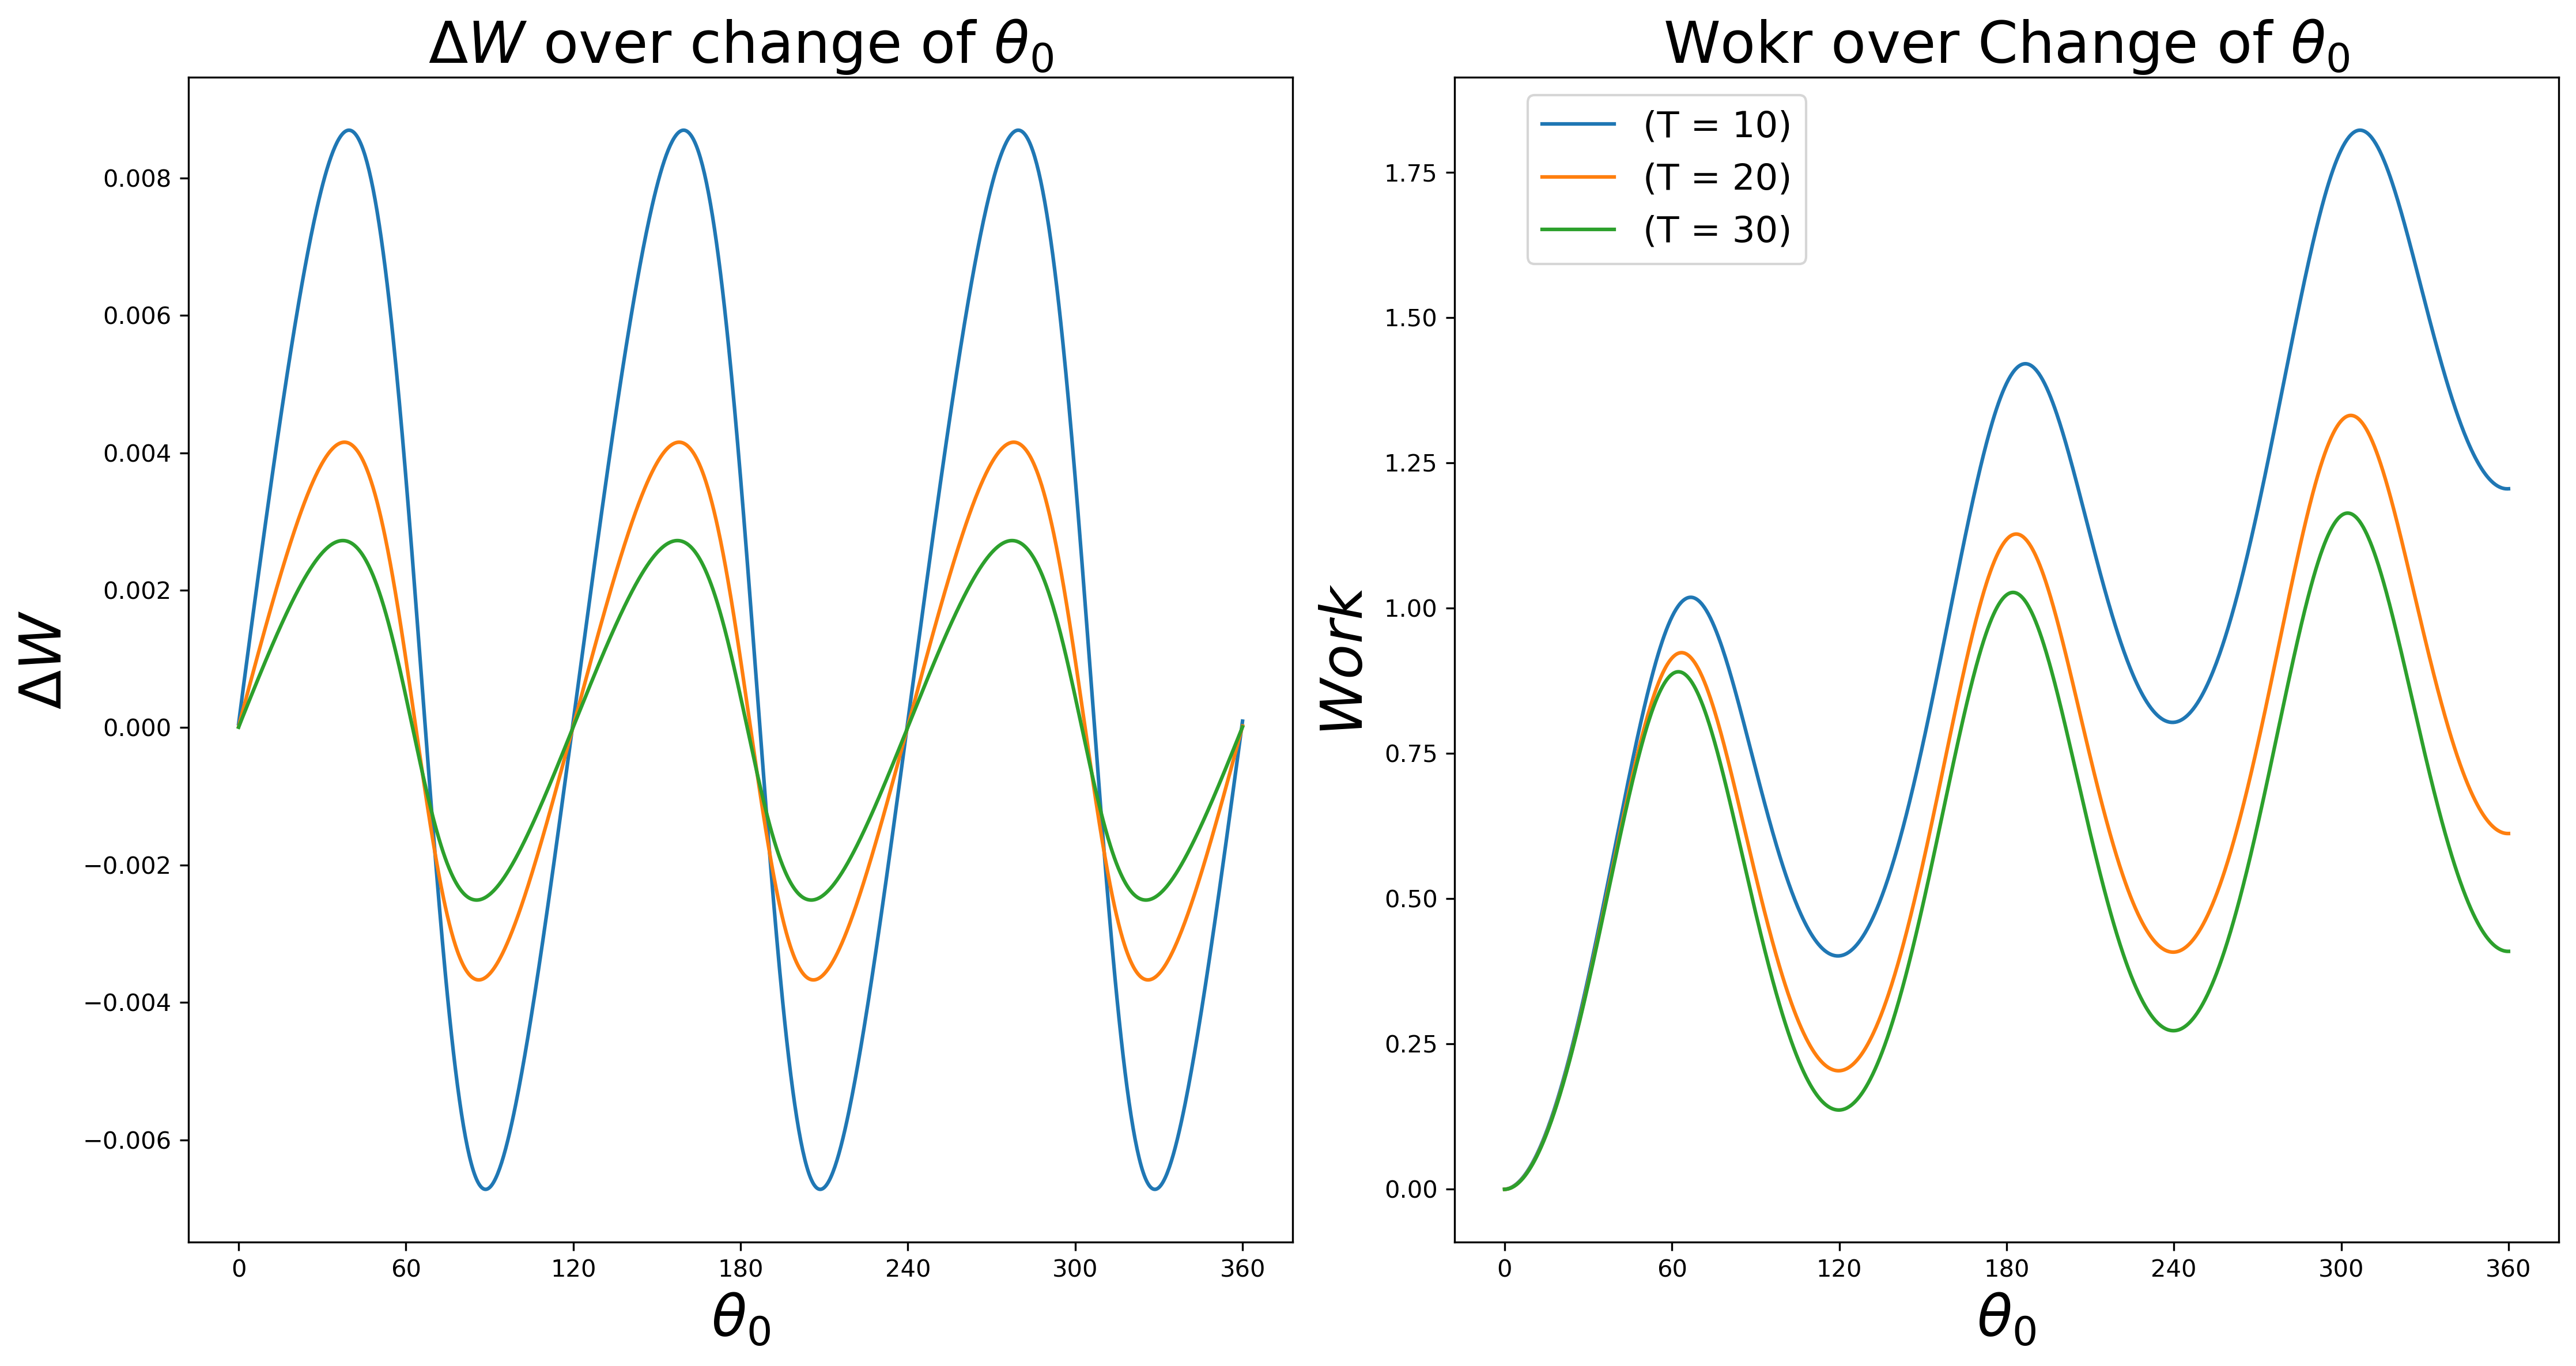

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Define the initial probability distribution
# Energy Barrier Height
E_chem = 5
# Perturbation Magnitude
E_trap = 3

theta0 = 0

theta_start = 0
theta_end = 2 * np.pi

transition_rate = Transition_Rates(Energy_Levels(E_chem, E_trap, theta0, barrier_relative_position))
p0 = calculate_stationary_distribution(transition_rate)

# Define the time step and number of steps
T_values = [10, 20, 30]  # Different values of T
dt = 0.01

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8), sharex=True,dpi = 300)

for T in T_values:
    # Solve the master equation
    p_evolution, control_path = master_equation(p0, dt, T, theta_end)
    # Calculate Work steps
    work, work_excess = calculate_work(p_evolution, control_path)
    # Calculate cumulative sum of Work
    cumulative_work = np.cumsum(work)
    cumulative_excess_work = np.cumsum(work_excess)

    # Plot dW in the first subplot
    ax1.plot(np.rad2deg(control_path[:-1]), work, label='dW (T = {})'.format(T))

    # Plot cumulative work in the second subplot
    ax2.plot(np.rad2deg(control_path[:-1]), cumulative_work, label='(T = {})'.format(T))

# Set x-axis label and title for both subplots
ax1.set_xlabel(r'$\theta_0$', fontsize=24)
ax1.set_ylabel(r'$\Delta W$', fontsize=24)
ax1.set_title(r'$\Delta W$ over change of $\theta_0$',fontsize=24)
ax2.set_xlabel(r'$\theta_0$', fontsize=24)
ax2.set_ylabel(r'$Work$', fontsize=24)
ax2.set_title(r'Work over Change of $\theta_0$',fontsize=24)

# Add legends to both subplots
#ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax2.legend(bbox_to_anchor=(0.05, 1), loc='upper left',fontsize=15)

# Set x-axis tick intervals for both subplots
ax1.xaxis.set_major_locator(ticker.MultipleLocator(base=60))
ax2.xaxis.set_major_locator(ticker.MultipleLocator(base=60))

plt.tight_layout()  # Adjust spacing between subplots
plt.show()


### Excess Work and Excess Power

In [43]:
# Create a figure with two subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 16), sharex=True,dpi=500)

# Define the initial probability distribution
# Energy Barrier Height
E_chem = 5
# Perturbation Magnitude
E_trap = 3

theta0 = 0

theta_start = 0
theta_end = 2 * np.pi

transition_rate = Transition_Rates(Energy_Levels(E_chem, E_trap, theta0, barrier_relative_position))
p0 = calculate_stationary_distribution(transition_rate)

# Define the time step and number of steps
T_values = [10, 20, 30]  # Different values of T
dt = 0.01

E_trap_values = np.arange(1,4,1)  # Define different E_trap values

T = 10
for E_trap in E_trap_values:
    
    theta0 = 0
    # Define the time step and number of steps
    transition_rate = Transition_Rates(Energy_Levels(E_chem,E_trap,theta0,barrier_relative_position))
    p0 = calculate_stationary_distribution(transition_rate)


    # Solve the master equation
    p_evolution, control_path = master_equation(p0, dt, T, theta_end)
    # Calculate Work steps
    work,work_excess = calculate_work(p_evolution,control_path)
    # Calculate cumulative sum of Work
    cumulative_work = np.cumsum(work)
    cumulative_work_excess = np.cumsum(work_excess)
    
    ax1.plot(np.rad2deg(control_path[:-1]), work, label=f'dw (E_trap={E_trap})')
    ax2.plot(np.rad2deg(control_path[:-1]), cumulative_work, label=f'k={E_trap}')
    ax3.plot(np.rad2deg(control_path[:-1]), work_excess, label=f'dw_ex (E_trap={E_trap})')
    ax4.plot(np.rad2deg(control_path[:-1]), cumulative_work_excess, label=f'dw_ex (E_trap={E_trap})')



ax1.set_ylabel(r'$\Delta W$',fontsize=24)
ax1.set_xlabel(r'$\theta_0$',fontsize=24)
ax1.set_title(r'$\Delta W$ over change of $\theta_0$',fontsize=24)
#ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.grid(True)

ax2.set_xlabel(r'$\theta_0$',fontsize=24)
ax2.set_ylabel(r'$Work$',fontsize=24)
ax2.set_title(r'Work over Change of $\theta_0$',fontsize=24)
ax2.legend(bbox_to_anchor=(0.05, 1), loc='upper left',fontsize=15)
ax2.grid(True)

# Set x-axis tick intervals for both subplots
ax1.xaxis.set_major_locator(ticker.MultipleLocator(base=60))
ax2.xaxis.set_major_locator(ticker.MultipleLocator(base=60))

ax3.set_ylabel(r'$\Delta W_{ex}$',fontsize=24)
ax3.set_xlabel(r'$\theta_0$',fontsize=24)
#ax3.set_title('Excess Work',fontsize=24)
#ax3.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax3.grid(True)

ax4.set_xlabel(r'$\theta_0$',fontsize=24)
ax4.set_ylabel('Excess Work',fontsize=24)
#ax4.set_title('Excess Work',fontsize=24)
#ax4.legend(bbox_to_anchor=(0.05, 1), loc='upper left',fontsize=15)
ax4.grid(True)

# Set x-axis tick intervals for both subplots
ax3.xaxis.set_major_locator(ticker.MultipleLocator(base=60))
ax4.xaxis.set_major_locator(ticker.MultipleLocator(base=60))


plt.tight_layout()  # Adjust spacing between subplots
plt.show()    
    

Optimal Path 

$\zeta(\theta_0) = \sum_{n=0}^{\infty}\sum_{i,j=1}^3[T^n]_{i,j}\delta t \delta X_i \delta X_j$

In [44]:
def conjugate_forces(E_trap,theta):
    
    F1 = -E_trap * np.sin(+0.0*np.pi/3.0 - theta)
    F2 = -E_trap * np.sin(+2.0*np.pi/3.0 - theta) 
    F3 = -E_trap * np.sin(+4.0*np.pi/3.0 - theta) 
    
    F = [F1,F2,F3]
    
    return F
    

In [45]:
def plot_friction_coefficient(theta_0, E_trap, Energy_Levels, dt):
    
    transition_rate = Transition_Rates(Energy_Levels)
    eq_dist = calculate_stationary_distribution(transition_rate)
    
    sum_result = 0
    n = 0
    val_list=[]
    
    F = conjugate_forces(E_trap,theta_0)
    avg_F = (F[0]*eq_dist[0] + F[1]*eq_dist[1] + F[2]*eq_dist[2])
    
    val0 = 0.0
    T_n = np.linalg.matrix_power(transition_rate, n=0)
    for i in range(3):
        for j in range(3):
            val0 += eq_dist[i] * T_n[i, j] * dt * (F[i] - avg_F) * (F[j] - avg_F)
    
    while True:
        T_n = np.linalg.matrix_power(transition_rate, n)
        val = 0
        for i in range(3):
            for j in range(3):
                val += eq_dist[i] * T_n[i, j] * dt * (F[i] - avg_F) * (F[j] - avg_F)
        val_list.append(val)
        n += 1        
        # Conditional check
        if val/val0 < 0.001:
            #print(n)
            break
        
    return val_list


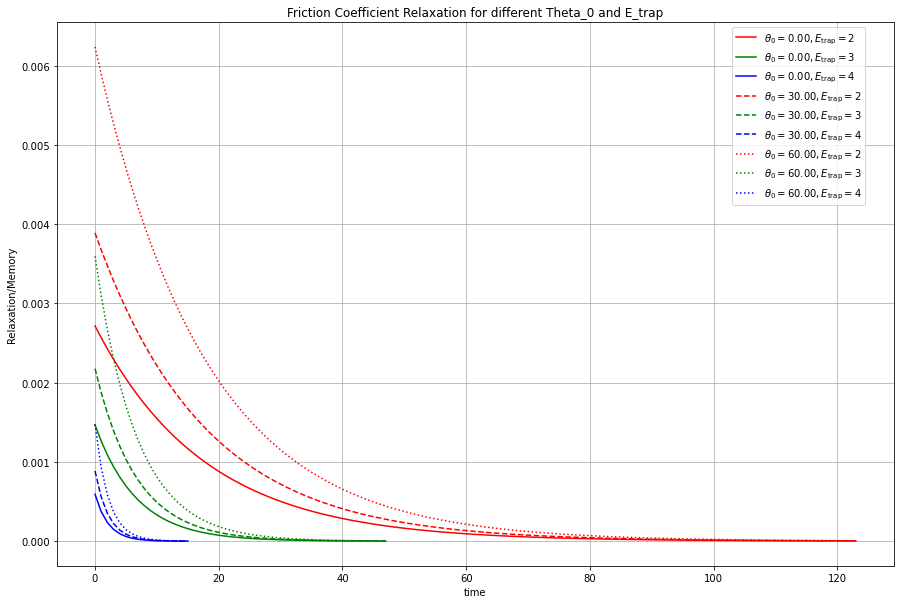

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Define the time step and number of steps
T = 10
dt = 0.01

theta_0_values = [0, np.pi/6, np.pi/3]  # Different values of theta_0
E_trap_values = [2, 3, 4]  # Different values of E_trap
E_chem = 5

plt.figure(figsize=(15, 10))
colors = ['red', 'green', 'blue'] 
linestyles = ['-', '--', ':']  # Line styles corresponding to theta_0_values

for i, theta_0 in enumerate(theta_0_values):
    for j, E_trap in enumerate(E_trap_values):
        E = Energy_Levels(E_chem, E_trap, theta, barrier_relative_position)
        fricition_evolution = plot_friction_coefficient(theta_0=theta_0, E_trap=E_trap, Energy_Levels=E, dt=dt)
        # Generate index values based on the length of the list
        indices = range(len(fricition_evolution))

        # Plot the list as a function of its index
        label = r'$\theta_0 = {:.2f}, E_{{\mathrm{{trap}}}} = {}$'.format(np.rad2deg(theta_0), E_trap)
        plt.plot(indices, fricition_evolution, label=label, color =colors[j],linestyle=linestyles[i] )

plt.xlabel('time')
plt.ylabel('Relaxation/Memory')
plt.title('Friction Coefficient Relaxation for different Theta_0 and E_trap')
plt.legend()
plt.legend(bbox_to_anchor=(0.8, 1), loc='upper left')
plt.grid(True)
plt.show()


In [47]:
import numpy as np

def calculate_friction_coefficient(theta_0, E_trap, Energy_Levels, dt):
    
    transition_rate = Transition_Rates(Energy_Levels)
    eq_dist = calculate_stationary_distribution(transition_rate)
    
    sum_result = 0
    n = 0
    
    F = conjugate_forces(E_trap,theta_0)
    avg_F = (F[0]*eq_dist[0] + F[1]*eq_dist[1] + F[2]*eq_dist[2])
    
    val0 = 0.0
    T_n = np.linalg.matrix_power(transition_rate, n=0)
    for i in range(3):
        for j in range(3):
            val0 += eq_dist[i] * T_n[i, j] * dt * (F[i] - avg_F) * (F[j] - avg_F)
    
    while True:
        T_n = np.linalg.matrix_power(transition_rate, n)
        val = 0
        for i in range(3):
            for j in range(3):
                val += eq_dist[i] * T_n[i, j] * dt * (F[i] - avg_F) * (F[j] - avg_F)
        sum_result += val
        n += 1        
        # Conditional check
        if val/val0 < 0.001:
            break
        
    return sum_result

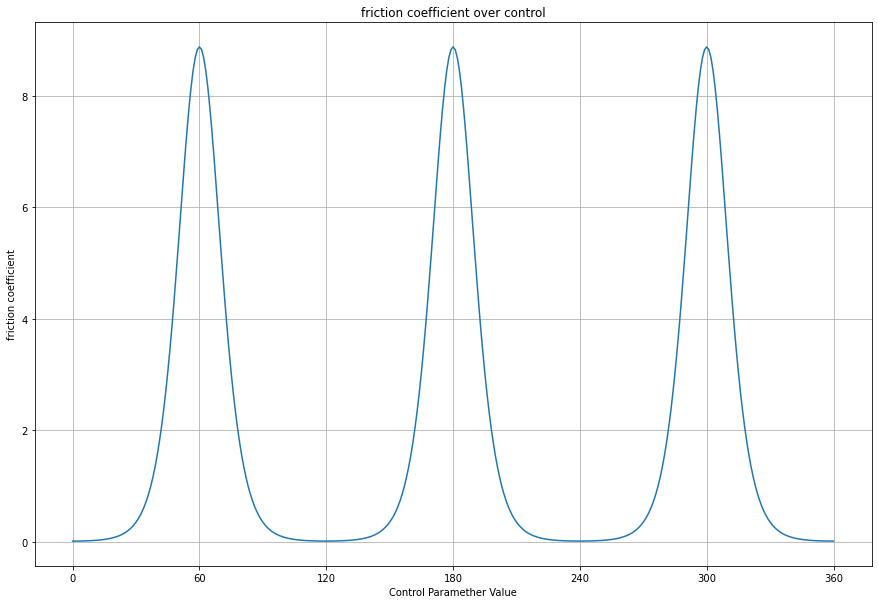

In [48]:
theta_values = np.linspace(0* np.pi/3, 6* np.pi/3, 361)
cor_vals = []

E_trap = 4
E_chem = 7

for theta in theta_values:
    E = Energy_Levels(E_chem,E_trap,theta,barrier_relative_position)
    carr_eff = calculate_friction_coefficient(theta , E_trap = 4, Energy_Levels = E, dt=0.01)
    cor_vals.append(carr_eff)
    
plt.figure(figsize=(15, 10))
plt.plot(np.rad2deg(theta_values), cor_vals)

plt.xlabel('Control Paramether Value')
plt.ylabel('friction coefficient')
plt.title('friction coefficient over control')
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(base=60))
plt.grid(True)
plt.show()

<Figure size 1080x720 with 0 Axes>

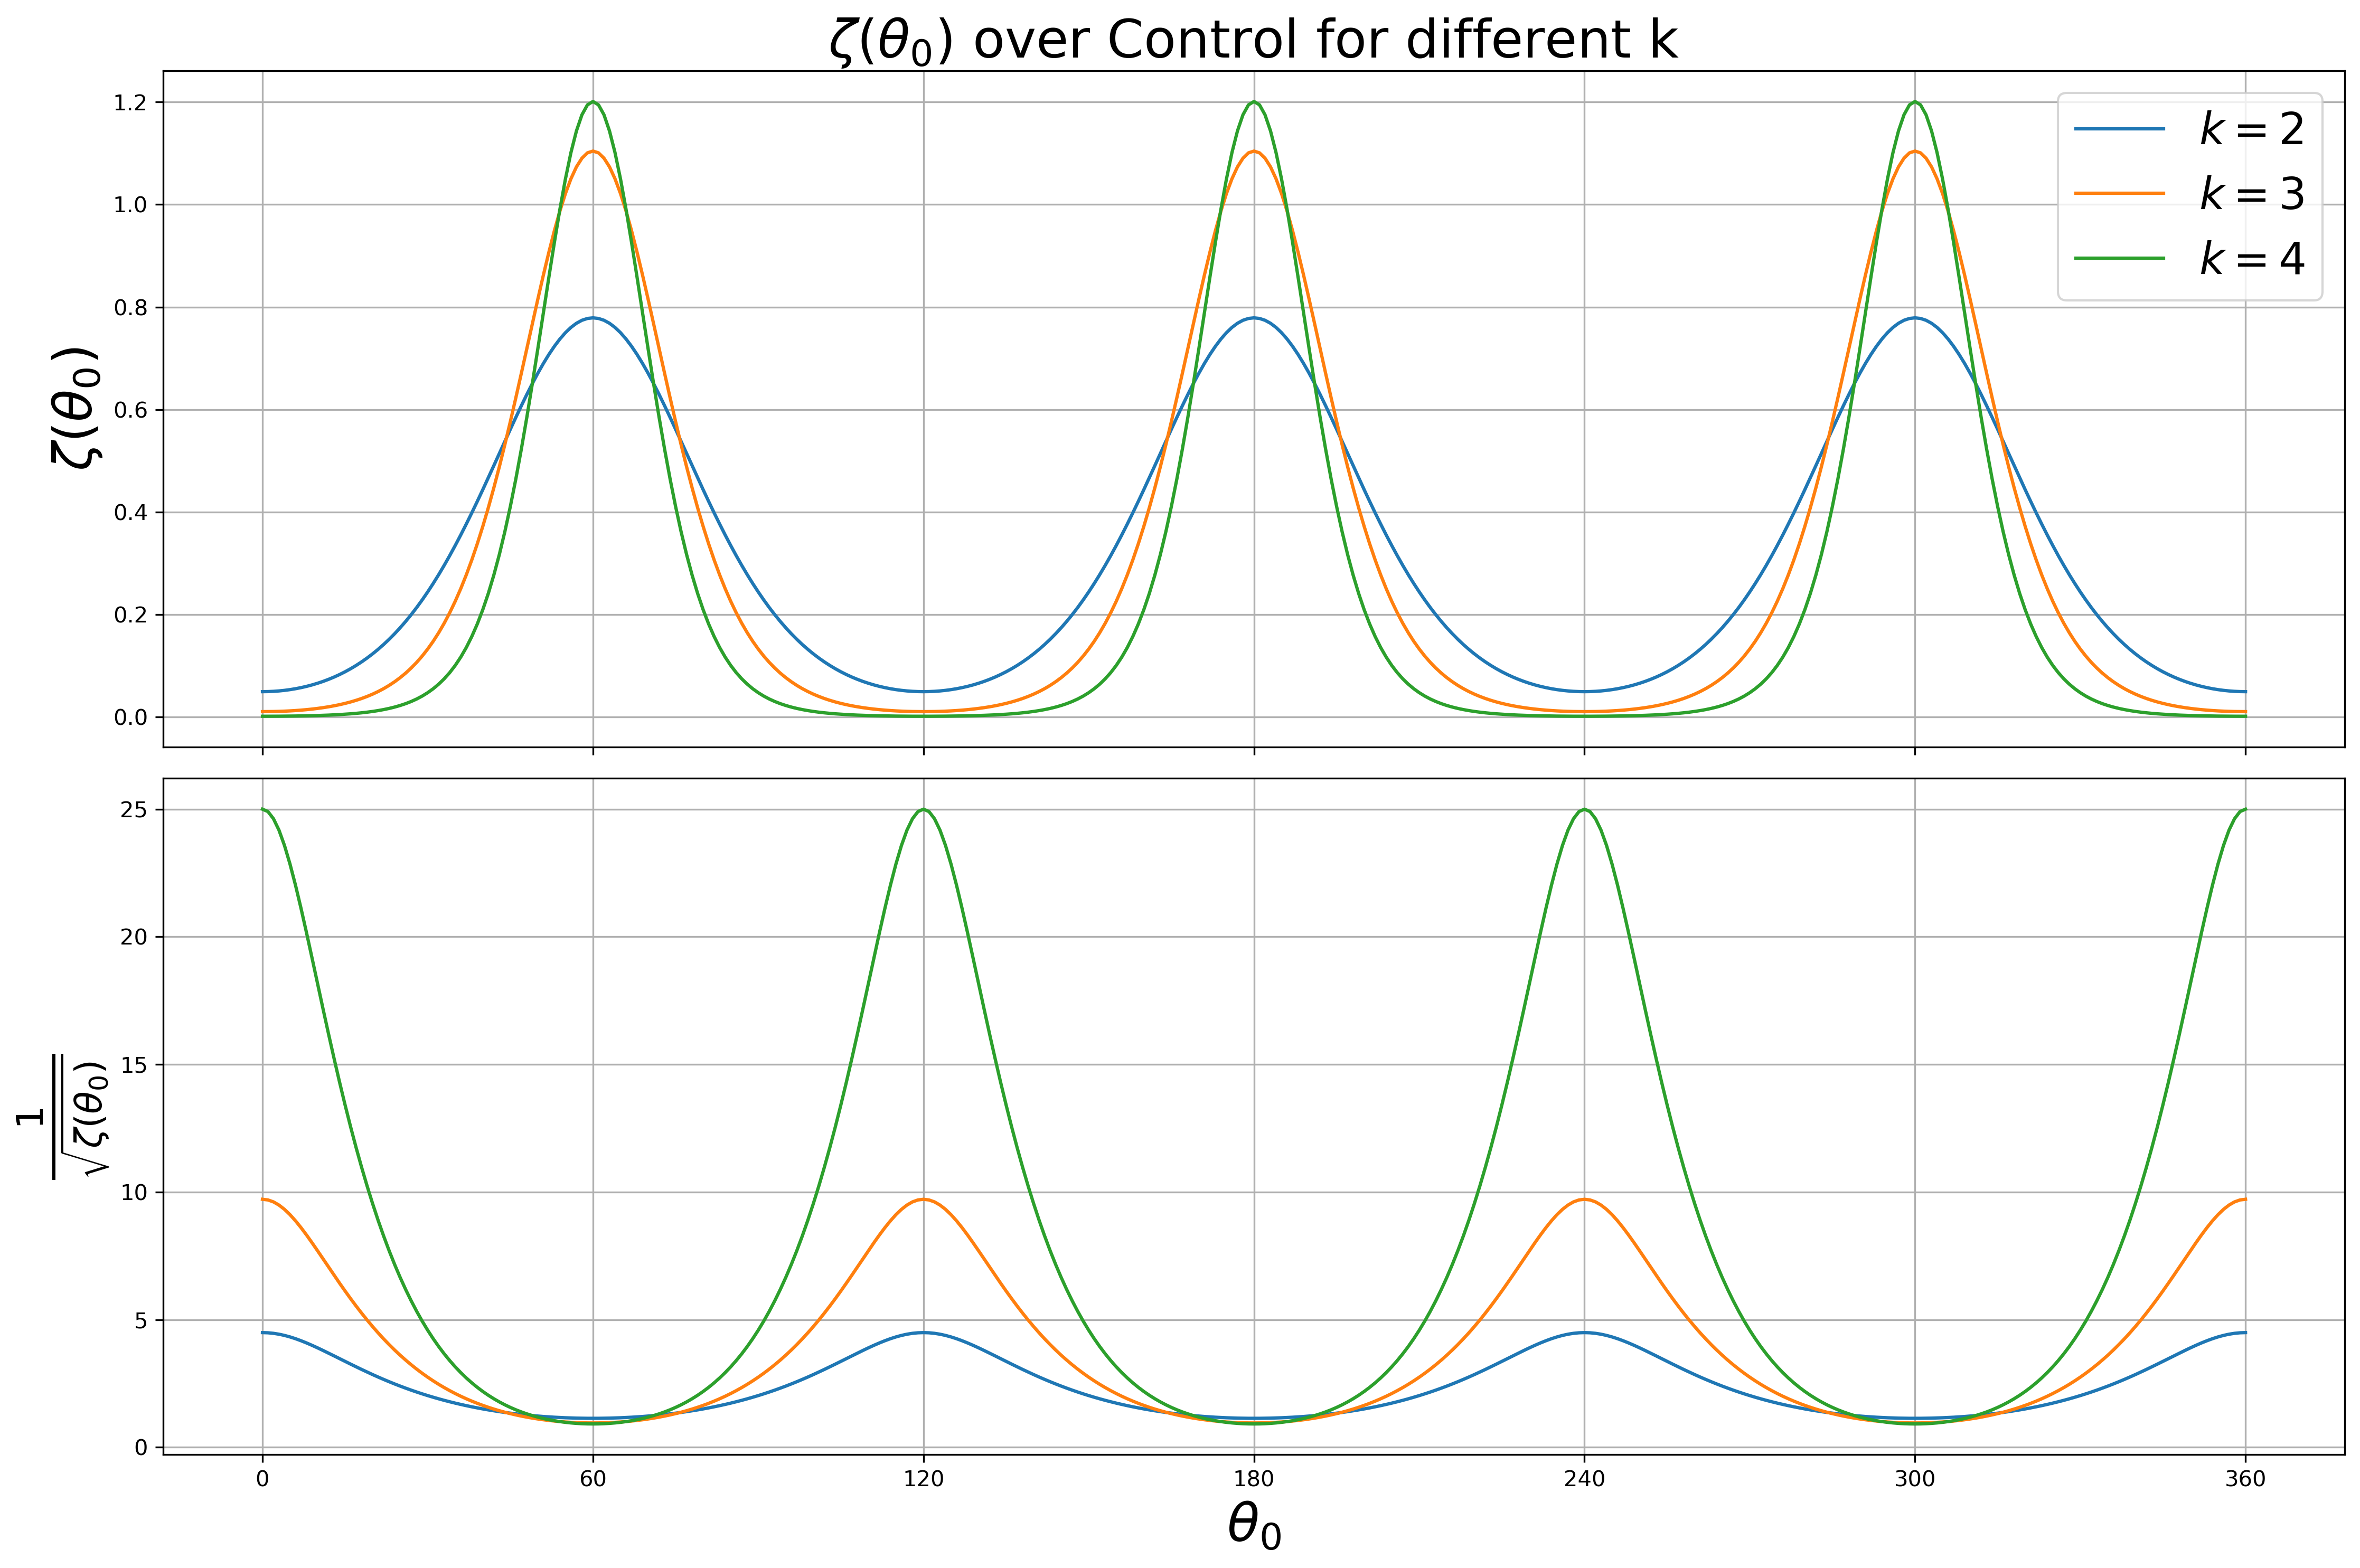

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Define the time step and number of steps
T = 10
dt = 0.01

theta_0_values = [0, np.pi/6, np.pi/3]  # Different values of theta_0
E_trap_values = [2, 3, 4]  # Different values of E_trap
E_chem = 5

plt.figure(figsize=(15, 10))
colors = ['red', 'green', 'blue'] 
linestyles = ['-', '--', ':']  # Line styles corresponding to theta_0_values

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10), sharex=True,dpi=300)

for E_trap in E_trap_values:
    cor_vals = []
    for theta in theta_values:
        E = Energy_Levels(E_chem, E_trap, theta, barrier_relative_position)
        carr_eff = calculate_friction_coefficient(theta, E_trap=E_trap, Energy_Levels=E, dt=dt)
        cor_vals.append(carr_eff)

    # Plot the list as a function of theta_values for each value of E_trap
    label = r'$k = {}$'.format(E_trap)
    ax1.plot(np.rad2deg(theta_values), cor_vals, label=label)
    
    sqrt_cor_vals = np.sqrt(cor_vals)
    ax2.plot(np.rad2deg(theta_values), 1.0/sqrt_cor_vals, label=label)


ax1.set_ylabel(r'$\zeta(\theta_0)$', fontsize=24)
ax1.set_title(r'$\zeta(\theta_0)$ over Control for different k',fontsize=24)
ax1.legend(fontsize=20)
ax1.grid(True)

ax2.set_xlabel(r'$\theta_0$', fontsize=24)
ax2.set_ylabel(r'$\frac{1}{\sqrt{\zeta(\theta_0)}}$',fontsize=24)
#ax2.set_title(r'$\sqrt{\zeta(\theta_0)}$ over Control for different k',fontsize=24)
#ax2.legend(fontsize=20)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(base=60))

ax2.grid(True)

# Adjust spacing between subplots
plt.tight_layout()
plt.show()
